In [1]:
import numpy as np 
import pandas as pd 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import re
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


### Imbalanced 


In [29]:
df= pd.read_csv('test17.csv')

In [30]:
df = df
df = df.dropna()
df.isna().sum()
df = df[["text","Sentiment"]]

In [31]:
X = df.text
Y = df.Sentiment
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = to_categorical(Y)


In [32]:
max_words = len(set(" ".join(X).split()))
max_len = X.apply(lambda x: len(x)).max()

In [33]:
max_words, max_len

(16434, 162)

In [34]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [36]:
embed_dim = 128
lstm_out = 100

model = Sequential()
model.add(Embedding(max_words, 100, input_length=X.shape[1]))
model.add(Dropout(0.4))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 24, 100)           1643400   
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 20, 64)            32064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 1,741,767
Trainable params: 1,741,767
Non-trainable params: 0
____________________________________________

In [37]:
verbose = 1
epochs = 10
batch_size = 120
validation_split = 0.2
history1 = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=verbose,validation_split=validation_split)

C:\Users\ab\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4827 samples, validate on 1207 samples
Epoch 1/10
4827/4827 [==============================] - 7s 1ms/step - loss: 0.7889 - accuracy: 0.7361 - val_loss: 0.7165 - val_accuracy: 0.7448
Epoch 2/10
4827/4827 [==============================] - 5s 1ms/step - loss: 0.6423 - accuracy: 0.7543 - val_loss: 0.5835 - val_accuracy: 0.7448
Epoch 3/10
4827/4827 [==============================] - 5s 1ms/step - loss: 0.4665 - accuracy: 0.7914 - val_loss: 0.5336 - val_accuracy: 0.7796
Epoch 4/10
4827/4827 [==============================] - 5s 1ms/step - loss: 0.3291 - accuracy: 0.8560 - val_loss: 0.5575 - val_accuracy: 0.7821
Epoch 5/10
4827/4827 [==============================] - 6s 1ms/step - loss: 0.2381 - accuracy: 0.8825 - val_loss: 0.6444 - val_accuracy: 0.7788
Epoch 6/10
4827/4827 [==============================] - 6s 1ms/step - loss: 0.1866 - accuracy: 0.9117 - val_loss: 0.7306 - val_accuracy: 0.7871
Epoch 7/10
4827/4827 [==============================] - 5s 1ms/step - loss: 0.1343 - acc

In [38]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss',fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

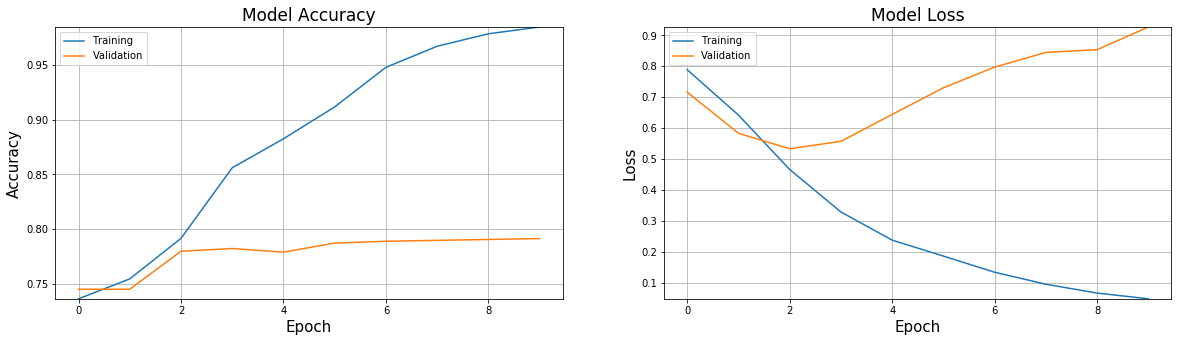

In [39]:
plot_performance(history=history1)

In [40]:
accuracy = model.evaluate(X_test, Y_test)

2587/2587 [==============================] - 1s 243us/step


In [41]:
print("\nModel Performance of CNN (Test Accuracy):")
print('v: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy[1]*100, accuracy[0]))


Model Performance of CNN (Test Accuracy):
v: 78.66%
Loss: 0.924



### Balanced

In [15]:
df= pd.read_csv('test17.csv')

In [16]:
df = df
df = df.dropna()
df.isna().sum()
df = df[["text","Sentiment"]]

In [17]:
X = df.text
Y = df.Sentiment
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = to_categorical(Y)

In [18]:
max_words = len(set(" ".join(X).split()))
max_len = X.apply(lambda x: len(x)).max()

In [19]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_train_seq = tokenizer.texts_to_sequences(X)
X_train_seq = pad_sequences(X_train_seq)

In [20]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()

In [21]:
X,Y= os.fit_sample(X_train_seq, Y)

C:\Users\ab\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [23]:
embed_dim = 128
lstm_out = 200

model = Sequential()
model.add(Embedding(max_words, 100, input_length=X.shape[1]))
model.add(Dropout(0.4))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 24, 100)           1643400   
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 64)            32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               212000    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603       
Total params: 1,888,067
Trainable params: 1,888,067
Non-trainable params: 0
____________________________________________

In [24]:
verbose = 1
epochs = 10
batch_size = 120
validation_split = 0.2
history1 = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=verbose,validation_split=validation_split)

C:\Users\ab\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10884 samples, validate on 2721 samples
Epoch 1/10
10884/10884 [==============================] - 16s 1ms/step - loss: 0.9126 - accuracy: 0.5500 - val_loss: 0.4803 - val_accuracy: 0.8199
Epoch 2/10
10884/10884 [==============================] - 13s 1ms/step - loss: 0.2690 - accuracy: 0.9053 - val_loss: 0.2307 - val_accuracy: 0.9210
Epoch 3/10
10884/10884 [==============================] - 15s 1ms/step - loss: 0.1037 - accuracy: 0.9668 - val_loss: 0.2012 - val_accuracy: 0.9364
Epoch 4/10
10884/10884 [==============================] - 16s 1ms/step - loss: 0.0542 - accuracy: 0.9836 - val_loss: 0.1921 - val_accuracy: 0.9445
Epoch 5/10
10884/10884 [==============================] - 15s 1ms/step - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.1843 - val_accuracy: 0.9471
Epoch 6/10
10884/10884 [==============================] - 14s 1ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.2200 - val_accuracy: 0.9427
Epoch 7/10
10884/10884 [==============================] - 15s 1ms/ste

In [25]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss',fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

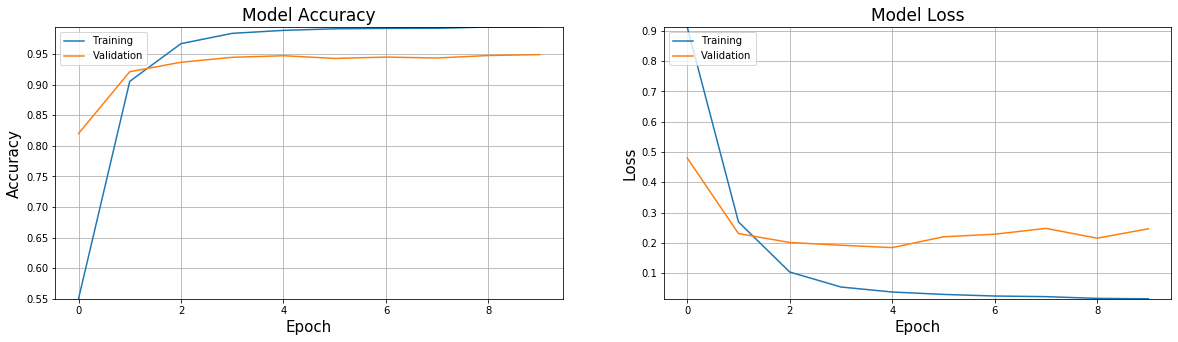

In [26]:
plot_performance(history=history1)

In [27]:
accuracy = model.evaluate(X_test, Y_test)

5832/5832 [==============================] - 2s 331us/step


In [28]:
print("\nModel Performance of CNN (Test Accuracy):")
print('v: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy[1]*100, accuracy[0]))


Model Performance of CNN (Test Accuracy):
v: 94.96%
Loss: 0.252

